# Geographic Analysis of Social Network Data 

## Sentiment analysis and Geospatial analysis on tweets using Python 
## Topic: National Institute of Drug Abuse 

## 1. Extracting twitter data (tweepy + pandas)

### 1.1. Importing our libraries

In [76]:
import tweepy          
import pandas as pd    
import numpy as np      
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1.2. Creating a Twitter App

In order to extract tweets for a posterior analysis, we need to access to our Twitter account and create an app. The website to do this is https://apps.twitter.com/

From this app that we're creating we will save the following information:

- Consumer Key (API Key)

- Consumer Secret (API Secret)

- Access Token

- Access Token Secret


In [77]:
CONSUMER_KEY    = 'hqn1AiJcMR1MwgUgXhppz9AmS'
CONSUMER_SECRET = 'ZRO82PBK5rzMODS3eWUeNK3596RuqMhnovE84EWHChDKQyZLaY'
ACCESS_TOKEN  = '983032100759719936-Qdj8ccEdropcNNkSsmG9KIeNNltgr8a'
ACCESS_SECRET = 'tkDcHS9sXI5DZtwB08cV9fmK0LI1XyHiDfvM5zLVxh9Oh'

In [78]:
# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
    
    # Return API with authentication:
    api = tweepy.API(auth)
    return api

### 1.3. Tweets extraction

In [11]:
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="NIDAnews", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 200.

5 recent tweets:

More than 50% of those with co-occurring mental health and substance use disorders do not receive treatment for eit… https://t.co/32rrYRBmpH

Needles are a common way people can get or pass a viral infection, such as HIV or Aids. 
https://t.co/Ulq8Ne7s9c https://t.co/vdDIvuIm7I

A common long-term side effect of Methamphetamine is “meth mouth”, a condition where users suffer from extreme toot… https://t.co/vx1myBqBvv

Drug and alcohol use can also directly damage the liver, increasing risk for chronic liver disease and cancer among… https://t.co/DikFEM3Njk

RT @BreatheBetter: Quitting smoking is one of the best ways to reduce lung damage that can lead to #COPD. #ThursdayThoughts



### 1.4. Creating a (pandas) DataFrame

In [79]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

,Tweets
0,More than 50% of those with co-occurring menta...
1,Needles are a common way people can get or pas...
2,A common long-term side effect of Methamphetam...
3,Drug and alcohol use can also directly damage ...
4,RT @BreatheBetter: Quitting smoking is one of ...
5,"Using inhalants can cause asphyxiation, suffoc..."
6,RT @HHSGov: Want a #HealthyHeart? Get moving! ...
7,RT @samhsagov: SAMHSA has published #opioid tr...
8,RT @NIH_NCCIH: Instead of #BadStockPhotosOfMyJ...
9,RT @NIHRecord: The opioid crisis: “Demand does...


An interesting thing is the number if internal methods that the tweetstructure has in Tweepy:

In [80]:
# Internal methods of a single tweet object:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


The interesting part from here is the quantity of metadata contained in a single tweet. If we want to obtain data such as the creation date, or the source of creation, we can access the info with this attributes. 

In [81]:
# We print info from the first tweet:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

1000818954254864384
2018-05-27 19:20:07
Hootsuite Inc.
6
9
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/32rrYRBmpH', 'expanded_url': 'https://twitter.com/i/web/status/1000818954254864384', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}


In [82]:
# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['coordinates']    = np.array([tweet.coordinates for tweet in tweets])

In [83]:
data

,Tweets,len,ID,Date,Source,Likes,coordinates
0,More than 50% of those with co-occurring menta...,140,1000818954254864384,2018-05-27 19:20:07,Hootsuite Inc.,6,None
1,Needles are a common way people can get or pas...,136,1000455331376398336,2018-05-26 19:15:13,Hootsuite Inc.,3,None
2,A common long-term side effect of Methamphetam...,140,1000381079256170497,2018-05-26 14:20:10,Hootsuite Inc.,5,None
3,Drug and alcohol use can also directly damage ...,140,1000092986057875456,2018-05-25 19:15:23,Hootsuite Inc.,4,None
4,RT @BreatheBetter: Quitting smoking is one of ...,123,1000091466147000320,2018-05-25 19:09:20,Twitter Web Client,0,None
5,"Using inhalants can cause asphyxiation, suffoc...",140,1000029204749193218,2018-05-25 15:01:56,Hootsuite Inc.,10,None
6,RT @HHSGov: Want a #HealthyHeart? Get moving! ...,140,1000011174606462976,2018-05-25 13:50:17,Twitter Web Client,0,None
7,RT @samhsagov: SAMHSA has published #opioid tr...,140,1000004753311567873,2018-05-25 13:24:47,Twitter Web Client,0,None
8,RT @NIH_NCCIH: Instead of #BadStockPhotosOfMyJ...,139,999770814009536512,2018-05-24 21:55:11,Twitter Web Client,0,None
9,RT @NIHRecord: The opioid crisis: “Demand does...,140,999739680852717568,2018-05-24 19:51:28,Twitter Web Client,0,None


In [84]:
data['timestamp'] = pd.to_datetime(data['Date'], unit='s')

In [85]:
data['timestamp'] = data['timestamp'].dt.strftime('%Y-%m-%d')

In [86]:
data

,Tweets,len,ID,Date,Source,Likes,coordinates,timestamp
0,More than 50% of those with co-occurring menta...,140,1000818954254864384,2018-05-27 19:20:07,Hootsuite Inc.,6,None,2018-05-27
1,Needles are a common way people can get or pas...,136,1000455331376398336,2018-05-26 19:15:13,Hootsuite Inc.,3,None,2018-05-26
2,A common long-term side effect of Methamphetam...,140,1000381079256170497,2018-05-26 14:20:10,Hootsuite Inc.,5,None,2018-05-26
3,Drug and alcohol use can also directly damage ...,140,1000092986057875456,2018-05-25 19:15:23,Hootsuite Inc.,4,None,2018-05-25
4,RT @BreatheBetter: Quitting smoking is one of ...,123,1000091466147000320,2018-05-25 19:09:20,Twitter Web Client,0,None,2018-05-25
5,"Using inhalants can cause asphyxiation, suffoc...",140,1000029204749193218,2018-05-25 15:01:56,Hootsuite Inc.,10,None,2018-05-25
6,RT @HHSGov: Want a #HealthyHeart? Get moving! ...,140,1000011174606462976,2018-05-25 13:50:17,Twitter Web Client,0,None,2018-05-25
7,RT @samhsagov: SAMHSA has published #opioid tr...,140,1000004753311567873,2018-05-25 13:24:47,Twitter Web Client,0,None,2018-05-25
8,RT @NIH_NCCIH: Instead of #BadStockPhotosOfMyJ...,139,999770814009536512,2018-05-24 21:55:11,Twitter Web Client,0,None,2018-05-24
9,RT @NIHRecord: The opioid crisis: “Demand does...,140,999739680852717568,2018-05-24 19:51:28,Twitter Web Client,0,None,2018-05-24


### 2. Sentiment analysis

### 2.1. Importing textblob

Anyway, getting back to the code we will just add an extra column to our data. This column will contain the sentiment analysis and we can plot the dataframe to see the update:

In [87]:
from textblob import TextBlob #TextBlob is a Python (2 and 3) library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.
import re #This module provides regular expression matching operations.Regular expressions use the backslash character ('\') to indicate special forms or to allow special characters to be used without invoking their special meaning. 

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

https://link.springer.com/chapter/10.1007/978-3-319-47602-5_40

In [88]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,coordinates,timestamp,SA
0,More than 50% of those with co-occurring menta...,140,1000818954254864384,2018-05-27 19:20:07,Hootsuite Inc.,6,None,2018-05-27,1
1,Needles are a common way people can get or pas...,136,1000455331376398336,2018-05-26 19:15:13,Hootsuite Inc.,3,None,2018-05-26,-1
2,A common long-term side effect of Methamphetam...,140,1000381079256170497,2018-05-26 14:20:10,Hootsuite Inc.,5,None,2018-05-26,-1
3,Drug and alcohol use can also directly damage ...,140,1000092986057875456,2018-05-25 19:15:23,Hootsuite Inc.,4,None,2018-05-25,1
4,RT @BreatheBetter: Quitting smoking is one of ...,123,1000091466147000320,2018-05-25 19:09:20,Twitter Web Client,0,None,2018-05-25,1
5,"Using inhalants can cause asphyxiation, suffoc...",140,1000029204749193218,2018-05-25 15:01:56,Hootsuite Inc.,10,None,2018-05-25,-1
6,RT @HHSGov: Want a #HealthyHeart? Get moving! ...,140,1000011174606462976,2018-05-25 13:50:17,Twitter Web Client,0,None,2018-05-25,0
7,RT @samhsagov: SAMHSA has published #opioid tr...,140,1000004753311567873,2018-05-25 13:24:47,Twitter Web Client,0,None,2018-05-25,1
8,RT @NIH_NCCIH: Instead of #BadStockPhotosOfMyJ...,139,999770814009536512,2018-05-24 21:55:11,Twitter Web Client,0,None,2018-05-24,0
9,RT @NIHRecord: The opioid crisis: “Demand does...,140,999739680852717568,2018-05-24 19:51:28,Twitter Web Client,0,None,2018-05-24,0


In [89]:
type(data)

pandas.core.frame.DataFrame

In [90]:
data

,Tweets,len,ID,Date,Source,Likes,coordinates,timestamp,SA
0,More than 50% of those with co-occurring menta...,140,1000818954254864384,2018-05-27 19:20:07,Hootsuite Inc.,6,None,2018-05-27,1
1,Needles are a common way people can get or pas...,136,1000455331376398336,2018-05-26 19:15:13,Hootsuite Inc.,3,None,2018-05-26,-1
2,A common long-term side effect of Methamphetam...,140,1000381079256170497,2018-05-26 14:20:10,Hootsuite Inc.,5,None,2018-05-26,-1
3,Drug and alcohol use can also directly damage ...,140,1000092986057875456,2018-05-25 19:15:23,Hootsuite Inc.,4,None,2018-05-25,1
4,RT @BreatheBetter: Quitting smoking is one of ...,123,1000091466147000320,2018-05-25 19:09:20,Twitter Web Client,0,None,2018-05-25,1
5,"Using inhalants can cause asphyxiation, suffoc...",140,1000029204749193218,2018-05-25 15:01:56,Hootsuite Inc.,10,None,2018-05-25,-1
6,RT @HHSGov: Want a #HealthyHeart? Get moving! ...,140,1000011174606462976,2018-05-25 13:50:17,Twitter Web Client,0,None,2018-05-25,0
7,RT @samhsagov: SAMHSA has published #opioid tr...,140,1000004753311567873,2018-05-25 13:24:47,Twitter Web Client,0,None,2018-05-25,1
8,RT @NIH_NCCIH: Instead of #BadStockPhotosOfMyJ...,139,999770814009536512,2018-05-24 21:55:11,Twitter Web Client,0,None,2018-05-24,0
9,RT @NIHRecord: The opioid crisis: “Demand does...,140,999739680852717568,2018-05-24 19:51:28,Twitter Web Client,0,None,2018-05-24,0


### 2.2. Analyzing the results

#### 2.2.1. Calculation of the percentage of the classified tweets

In [91]:
pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [92]:
pos_tweets

['More than 50% of those with co-occurring mental health and substance use disorders do not receive treatment for eit… https://t.co/32rrYRBmpH',
 'Drug and alcohol use can also directly damage the liver, increasing risk for chronic liver disease and cancer among… https://t.co/DikFEM3Njk',
 'RT @BreatheBetter: Quitting smoking is one of the best ways to reduce lung damage that can lead to #COPD. #ThursdayThoughts',
 'RT @samhsagov: SAMHSA has published #opioid treatment guidance for women who are pregnant and/or mothers of infants. Learn more: https://t.…',
 'Helping providers address addiction is the core of #NIDAMED. Check out the NEW@AddictionPolicy hospital toolkit to… https://t.co/TJPoVBYC2r',
 'Teachers: Did you know NIDA has a collection of more than 90 free science-based lessons and activities for use in y… https://t.co/h3ledAmFoX',
 'Intervening early in a child’s life can help prevent substance use disorders later in life. https://t.co/hEItT8MtlB https://t.co/yXiqv4ldCD',
 'RT

In [93]:
neu_tweets

['RT @HHSGov: Want a #HealthyHeart? Get moving! Here are some ways you can #MoveWithHeart today! https://t.co/L9BBO6TMhB #MoveInMay #Hyperten…',
 'RT @NIH_NCCIH: Instead of #BadStockPhotosOfMyJob, check out @NIH’s #RealScience photos. Here, as part of an investigation of the molecular…',
 'RT @NIHRecord: The opioid crisis: “Demand doesn’t come from Mafia or street peddlers,” said @samquinones @NIDA lecture. “It comes from doct…',
 'RT @genome_gov: The Undiagnosed Diseases Program is celebrating 10 years of solving medical mysteries. The program kicked off in May 2008 w…',
 'RT @NIHClinicalCntr: DYK #NIH research supports jobs at local universities, hospitals, research institutions &amp; businesses? https://t.co/qcs…',
 'RT @FDATobacco: Smoking can interrupt blood flow to the brain and can lead to #stroke. #StrokeMonth https://t.co/iHn35HLhtb',
 'It’s Global Youth Traffic Safety Month! Learn about drugged driving and steps you can take to prevent it:… https://t.co/3ougtvBufD',
 'RT @NIH

In [94]:
neg_tweets

['Needles are a common way people can get or pass a viral infection, such as HIV or Aids. \nhttps://t.co/Ulq8Ne7s9c https://t.co/vdDIvuIm7I',
 'A common long-term side effect of Methamphetamine is “meth mouth”, a condition where users suffer from extreme toot… https://t.co/vx1myBqBvv',
 'Using inhalants can cause asphyxiation, suffocation, seizures, or coma after just one use. \nhttps://t.co/lIfUw3oaiI… https://t.co/00xD5f3FBF',
 'cathinones is “bath salts,” a common substitute for stimulants such as methamphetamine and cocaine.… https://t.co/qV6tAJfZpz',
 'RT @NIDDKgov: Don’t get delay in getting the treatment you need – mental illness can lead to further health problems. https://t.co/URCqLgmw…',
 'RT @US_FDA: Do NOT use over-the-counter (OTC) teething products containing benzocaine. These products pose a serious risk to infants and ch…',
 'Even though over-the-counter (OTC) medicines can be sold without an #Rx, they can be dangerously misused.… https://t.co/mPZ8QsoG8v',
 'Repeated co

In [95]:
print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 47.0%
Percentage of neutral tweets: 39.0%
Percentage de negative tweets: 14.0%


#### 2.2.2. Infographics of the tweets

In [96]:
data.head()

,Tweets,len,ID,Date,Source,Likes,coordinates,timestamp,SA
0,More than 50% of those with co-occurring menta...,140,1000818954254864384,2018-05-27 19:20:07,Hootsuite Inc.,6,None,2018-05-27,1
1,Needles are a common way people can get or pas...,136,1000455331376398336,2018-05-26 19:15:13,Hootsuite Inc.,3,None,2018-05-26,-1
2,A common long-term side effect of Methamphetam...,140,1000381079256170497,2018-05-26 14:20:10,Hootsuite Inc.,5,None,2018-05-26,-1
3,Drug and alcohol use can also directly damage ...,140,1000092986057875456,2018-05-25 19:15:23,Hootsuite Inc.,4,None,2018-05-25,1
4,RT @BreatheBetter: Quitting smoking is one of ...,123,1000091466147000320,2018-05-25 19:09:20,Twitter Web Client,0,None,2018-05-25,1


In [97]:
# New Pandas DataFrame with a new name of the field including the Sentiment Analysis results (SA)
df1=data.rename(columns={'SA':'Polarity'})
df1.head()

,Tweets,len,ID,Date,Source,Likes,coordinates,timestamp,Polarity
0,More than 50% of those with co-occurring menta...,140,1000818954254864384,2018-05-27 19:20:07,Hootsuite Inc.,6,None,2018-05-27,1
1,Needles are a common way people can get or pas...,136,1000455331376398336,2018-05-26 19:15:13,Hootsuite Inc.,3,None,2018-05-26,-1
2,A common long-term side effect of Methamphetam...,140,1000381079256170497,2018-05-26 14:20:10,Hootsuite Inc.,5,None,2018-05-26,-1
3,Drug and alcohol use can also directly damage ...,140,1000092986057875456,2018-05-25 19:15:23,Hootsuite Inc.,4,None,2018-05-25,1
4,RT @BreatheBetter: Quitting smoking is one of ...,123,1000091466147000320,2018-05-25 19:09:20,Twitter Web Client,0,None,2018-05-25,1


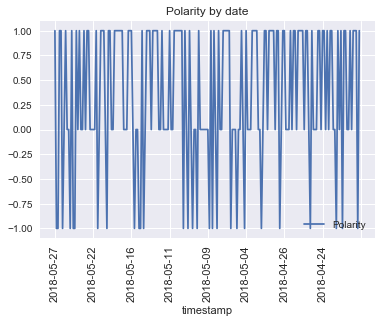

In [98]:
# Graph of the Polarity by dates (2017 and 2018)
df1.plot( kind='line', x='timestamp', y='Polarity',title='Polarity by date')
axes = plt.gca()
plt.xticks(rotation='vertical', fontsize=11)
plt.show()

In [99]:
# Graph of the Polarity by hour for a specific day
df1['Hour'] = pd.to_datetime(df1['Date'], format='%H:%M').dt.hour # to create a new column with the hour information
df1.head()

,Tweets,len,ID,Date,Source,Likes,coordinates,timestamp,Polarity,Hour
0,More than 50% of those with co-occurring menta...,140,1000818954254864384,2018-05-27 19:20:07,Hootsuite Inc.,6,None,2018-05-27,1,19
1,Needles are a common way people can get or pas...,136,1000455331376398336,2018-05-26 19:15:13,Hootsuite Inc.,3,None,2018-05-26,-1,19
2,A common long-term side effect of Methamphetam...,140,1000381079256170497,2018-05-26 14:20:10,Hootsuite Inc.,5,None,2018-05-26,-1,14
3,Drug and alcohol use can also directly damage ...,140,1000092986057875456,2018-05-25 19:15:23,Hootsuite Inc.,4,None,2018-05-25,1,19
4,RT @BreatheBetter: Quitting smoking is one of ...,123,1000091466147000320,2018-05-25 19:09:20,Twitter Web Client,0,None,2018-05-25,1,19


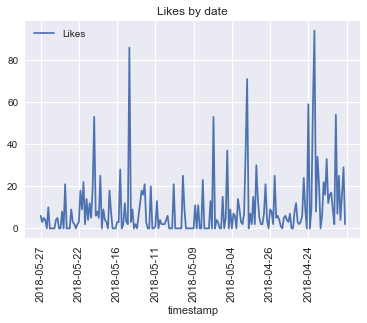

In [100]:
# Graph of the Likes by dates (2017 and 2018)
df1.plot( kind='line', x='timestamp', y='Likes',title='Likes by date')
axes = plt.gca()
plt.xticks(rotation='vertical', fontsize=11)
plt.show()

## 3. Export the dataframe

In [39]:
data.to_csv('NIDA_data_twitter.csv')

## 4. QuantumGIS processing

NIDA has not activated the Twiter location-sharing mode, we need to simulate a creation of 200 random location points within the administrative boundaries of US.

 - Inside QuantumGIS I had calculated a shapefile with 200 random points inside US. Use the function "Random Points in layer bounds" (Menu Vector, Research tools).

- Add the longitude and latitude columns with the option "Export/Add geometry columns" (Menu Vector, Geometry tools).

- Use the exported file csv file ('data_twitter.csv') and perform a join with the random points layer.

## 5. Import the joined shapefile to Jupyter and create a geodataframe

In [101]:
import geopandas as gpd
gdf = gpd.read_file('/Users/mariiashcherbiak/Desktop/AHS_2011_S01AO/tl_2017_us_state/Untitled.shp')
gdf = gdf.to_crs({'init': 'epsg:4326'})

In [102]:
gdf

,id,NIDA_data_,NIDA_dat_1,NIDA_dat_2,NIDA_dat_3,NIDA_dat_4,NIDA_dat_5,NIDA_dat_6,NIDA_dat_7,NIDA_dat_8,NIDA_dat_9,Added geom,Added ge_1,Added ge_2,geometry
0,0,0,More than 50% of those with co-occurring menta...,140,1000818954254864384,2018-05-27 19:20:07,Hootsuite Inc.,6,,2018-05-27,1,0,-165.90207,54.01485,POINT (-165.9020661677855 54.01485025030087)
1,1,1,Needles are a common way people can get or pas...,136,1000455331376398336,2018-05-26 19:15:13,Hootsuite Inc.,3,,2018-05-26,-1,1,-102.53020,38.34076,POINT (-102.5302013111695 38.34076160789068)
2,2,2,A common long-term side effect of Methamphetam...,140,1000381079256170497,2018-05-26 14:20:10,Hootsuite Inc.,5,,2018-05-26,-1,2,-78.82948,41.53422,POINT (-78.82948393554692 41.53422290457474)
3,3,3,Drug and alcohol use can also directly damage ...,140,1000092986057875456,2018-05-25 19:15:23,Hootsuite Inc.,4,,2018-05-25,1,3,-100.99973,39.37468,POINT (-100.9997291546571 39.37467635300931)
4,4,4,RT @BreatheBetter: Quitting smoking is one of ...,123,1000091466147000320,2018-05-25 19:09:20,Twitter Web Client,0,,2018-05-25,1,4,-162.86548,62.86069,POINT (-162.8654781381066 62.86068592946901)
5,5,5,"Using inhalants can cause asphyxiation, suffoc...",140,1000029204749193218,2018-05-25 15:01:56,Hootsuite Inc.,10,,2018-05-25,-1,5,-68.69174,47.05672,POINT (-68.69173813345633 47.05671781931497)
6,6,6,RT @HHSGov: Want a #HealthyHeart? Get moving! ...,140,1000011174606462976,2018-05-25 13:50:17,Twitter Web Client,0,,2018-05-25,0,6,-91.86183,43.09717,POINT (-91.8618337410997 43.09717361819764)
7,7,7,RT @samhsagov: SAMHSA has published #opioid tr...,140,1000004753311567873,2018-05-25 13:24:47,Twitter Web Client,0,,2018-05-25,1,7,-158.92027,60.53106,POINT (-158.9202748636829 60.53106268271964)
8,8,8,RT @NIH_NCCIH: Instead of #BadStockPhotosOfMyJ...,139,999770814009536512,2018-05-24 21:55:11,Twitter Web Client,0,,2018-05-24,0,8,-85.66712,30.60751,POINT (-85.6671245444425 30.60750857097383)
9,9,9,RT @NIHRecord: The opioid crisis: âDemand do...,140,999739680852717568,2018-05-24 19:51:28,Twitter Web Client,0,,2018-05-24,0,9,-80.88692,36.32550,POINT (-80.88692209076954 36.32550315653573)


In [67]:
gdf.NIDA_dat_9 = gdf.NIDA_dat_9.astype(str)

## 6.Webmapping of Tweets with Folium

### 6.1. Installation:

https://github.com/python-visualization/folium

$ pip install folium

### 6.2. Creation of a webmap with twitter location by date

In [103]:
import folium

In [105]:
#Create a Twitter basemap specifying map center, zoom level, and using the CartoDB Positron tiles
Twitter_map = folium.Map([60.53106, -158.92027], tiles='cartodbpositron', zoom_start = 5)
Twitter_map

https://deparkes.co.uk/2016/06/10/folium-map-tiles/

In [74]:
#Create a location list based on the Geodataframe to used in the folium.Marker
locations = gdf[['Added ge_2', 'Added ge_1']]
locationlist = locations.values.tolist()
len(locationlist)
locationlist[7]

[60.53106, -158.92027]

In [106]:
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=gdf['NIDA_dat_9'][point],icon=folium.Icon(color='darkblue', icon_color='white', icon='male', angle=0, prefix='fa')).add_to(Twitter_map) #You can use different fonts such as "bicycle", "info-sign", "cloud".
Twitter_map

In [73]:
help(folium.Icon)

Help on class Icon in module folium.map:

class Icon(branca.element.MacroElement)
 |  Creates an Icon object that will be rendered
 |  using Leaflet.awesome-markers.
 |  
 |  Parameters
 |  ----------
 |  color : str, default 'blue'
 |      The color of the marker. You can use:
 |  
 |          ['red', 'blue', 'green', 'purple', 'orange', 'darkred',
 |           'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue',
 |           'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen',
 |           'gray', 'black', 'lightgray']
 |  
 |  icon_color : str, default 'white'
 |      The color of the drawing on the marker. You can use colors above,
 |      or an html color code.
 |  icon : str, default 'info-sign'
 |      The name of the marker sign.
 |      See Font-Awesome website to choose yours.
 |      Warning : depending on the icon you choose you may need to adapt
 |      the `prefix` as well.
 |  angle : int, default 0
 |      The icon will be rotated by this amount of degrees.
 

In [107]:
Twitter_map.save('Twitter_NIDA_map.html') #save HTML